In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [2]:
img = cv2.imread("HelloDarknessMyOldFriend.png")

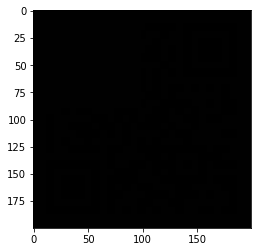

In [3]:
plt.imshow(img)

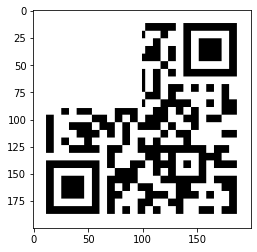

In [4]:
plt.imshow((img==1)*255)

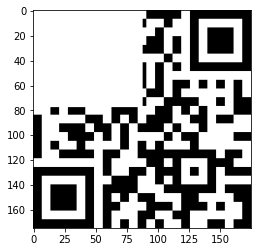

In [5]:
img = (img[12:187,12:187]==1)*255
plt.imshow(img)

In [6]:
img.shape

(175, 175, 3)

In [7]:
mask = np.zeros_like(img)
for i in range(0,175,7):
    for j in range(0,175,7):
        
        _j = j//7
        if _j%3==0:
            mask[i:i+7, j:j+7]=255

mask[:63,:63] = [255,0,0]
mask[:63,119:] = [255,0,0]
mask[119:,:63] = [255,0,0]
mask[:,42:49] = [255,0,0]
mask[42:49,:] = [255,0,0]
mask[112:147,112:147] = [255,0,0]

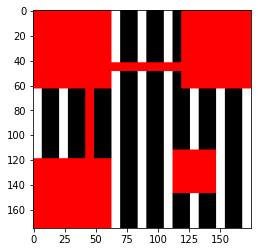

In [8]:
plt.imshow(mask)

In [9]:
img_bool = (img/256).astype(np.bool)
mask_bool = (mask/256).astype(np.bool)
img_mask = img_bool ^ mask_bool

/var/folders/jm/wtxhnh6j5w9c0pb8cqk1jtx80000gn/T/ipykernel_3753/2265126347.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_bool = (img/256).astype(np.bool)
/var/folders/jm/wtxhnh6j5w9c0pb8cqk1jtx80000gn/T/ipykernel_3753/2265126347.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_bool = (mask/256).astype(np.bool)


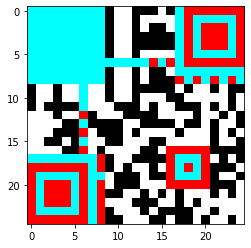

In [10]:
img_mask = img_mask.astype(np.float32)
img_mask=cv2.resize(img_mask, (175//7, 175//7))
plt.imshow(img_mask)

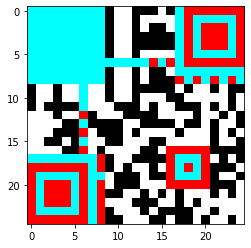

In [11]:
plt.imshow(img_mask)

In [12]:
img_mask = img_mask.astype(np.int32)

In [13]:
forward = "up"
x = 24
y = 24
values = []
while x>0 or y>0:
    if np.sum(img_mask[y,x]==1)==1 or np.sum(img_mask[y,x]==1)==2:
        pass
    else:
        values.append(np.sum(img_mask[y,x]==0)//3)
    if np.sum(img_mask[y,x-1]==1)==1 or np.sum(img_mask[y,x-1]==1)==2:
        pass
    else:
        values.append(np.sum(img_mask[y,x-1]==0)//3)
    if forward=="up":
        if y!=0:
            y-=1
        else:
            x-=2
            forward="down"
    else:
        if y!=24:
            y+=1
        else:
            x-=2
            forward="up"

In [14]:
for i in range(4,len(values),8):
    char = int("".join([str(j) for j in values[i:i+8]]),2)
    print(chr(char), end="")

nite{tH@T'$_qRazzYyYy}ÁÁUUJª«XñhóÎ¡ ª-